## Setup

In [45]:
import json
import os

import matplotlib.pyplot as plt
import requests
from venn import venn

In [46]:
# Profile locations

profiles_path = '../profiles'
profile_urls = [
    'https://raw.githubusercontent.com/GSA/fedramp-automation/refs/heads/master/dist/content/rev5/baselines/json/FedRAMP_rev5_MODERATE-baseline_profile-min.json',
    'https://raw.githubusercontent.com/GSA/fedramp-automation/refs/heads/master/dist/content/rev5/baselines/json/FedRAMP_rev5_HIGH-baseline_profile-min.json',
    'https://raw.githubusercontent.com/usnistgov/oscal-content/refs/heads/main/nist.gov/SP800-53/rev5/json/NIST_SP-800-53_rev5_MODERATE-baseline_profile.json',
    'https://raw.githubusercontent.com/usnistgov/oscal-content/refs/heads/main/nist.gov/SP800-53/rev5/json/NIST_SP-800-53_rev5_HIGH-baseline_profile.json',
    'https://raw.githubusercontent.com/usnistgov/oscal-content/refs/heads/main/nist.gov/SP800-53/rev5/json/NIST_SP-800-53_rev5_PRIVACY-baseline_profile.json'
]

## OSCAL Profile Wrapper

In [47]:
# Wrapper for OSCAL profile file

class profile(dict):
    def __init__(self, data):
        self.data = data
        self.title = data['profile']['metadata']['title']

        self.controls = set()
        for i in data['profile']['imports']:
            self.controls.update(i['include-controls'][0]['with-ids'])

## Read Profiles

In [48]:
# Read profiles

profile_data = {}

# Read CCCS profiles
for root, dirs, files in os.walk(profiles_path):
    for filename in files:
        if filename.endswith('.json') and 'resolved' not in filename:
            file_path = os.path.join(root, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                if 'profile' in data:
                    profile_data[data['profile']['metadata']['title']] = data

# Read online profiles
for url in profile_urls:
    data = requests.get(url).json()
    profile_data[data['profile']['metadata']['title']] = data

profiles = {k: profile(v) for k, v in profile_data.items()}

# Create profile objects
cccs_cloud_medium = profile(profile_data['CCCS Cloud Medium Profile'])
cccs_medium_pbhva = profile(profile_data['CCCS Medium + PBHVA Profile'])
cccs_medium_impact = profile(profile_data['CCCS ITSP.10.033-01 Medium Impact Profile'])
cccs_171 = profile(profile_data['CCCS ITSP.10.171 Profile'])

fedramp_moderate = profile(profile_data['FedRAMP Rev 5 Moderate Baseline'])
fedramp_high = profile(profile_data['FedRAMP Rev 5 High Baseline'])

nist_moderate = profile(profile_data['NIST Special Publication 800-53 Revision 5.1.1 MODERATE IMPACT BASELINE'])
nist_high = profile(profile_data['NIST Special Publication 800-53 Revision 5.1.1 HIGH IMPACT BASELINE'])
nist_privacy = profile(profile_data['NIST Special Publication 800-53 Revision 5.1.1 PRIVACY BASELINE'])

## Medium Profiles

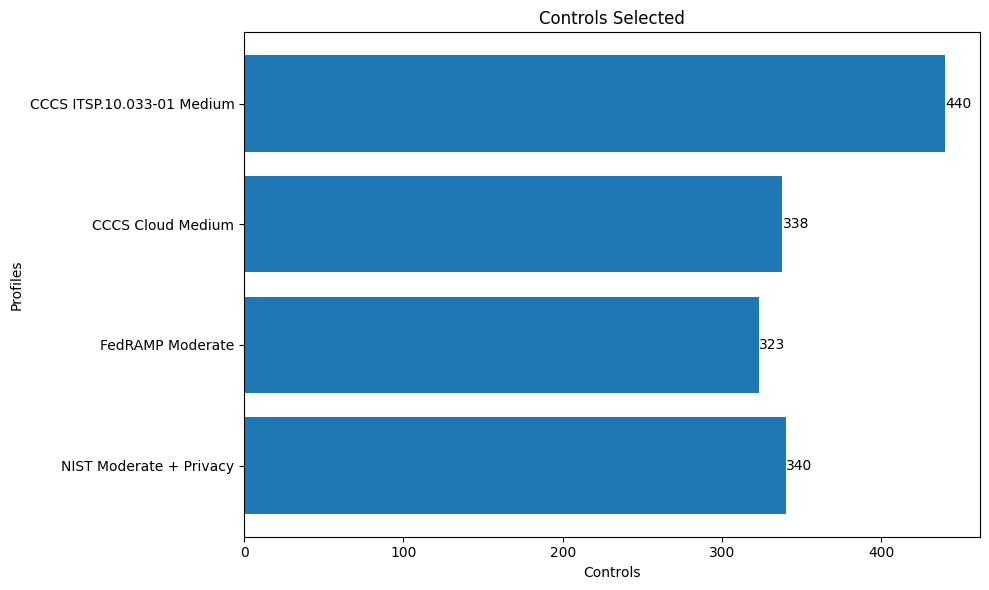

In [49]:
# Load data
categories = ['NIST Moderate + Privacy', 'FedRAMP Moderate', 'CCCS Cloud Medium', 'CCCS ITSP.10.033-01 Medium']
values = [len(c) for c in [
    nist_moderate.controls | nist_privacy.controls, 
    fedramp_moderate.controls, 
    cccs_cloud_medium.controls, 
    cccs_medium_impact.controls
    ]
]

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(categories, values)

# Customize the plot
plt.title('Controls Selected')
plt.xlabel('Controls')
plt.ylabel('Profiles')

# Add value labels on the bars
for i, v in enumerate(values):
    plt.text(v, i, str(v), va='center')

plt.tight_layout()
plt.show()

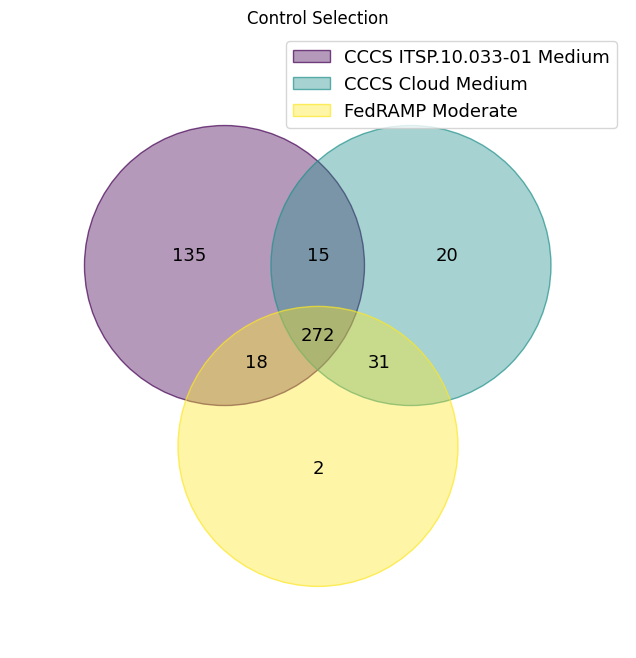

In [50]:
sets = {
    'CCCS ITSP.10.033-01 Medium': cccs_medium_impact.controls,
    'CCCS Cloud Medium': cccs_cloud_medium.controls,
    'FedRAMP Moderate': fedramp_moderate.controls
}

venn(sets)
plt.title("Control Selection")
plt.show()


## High Profiles

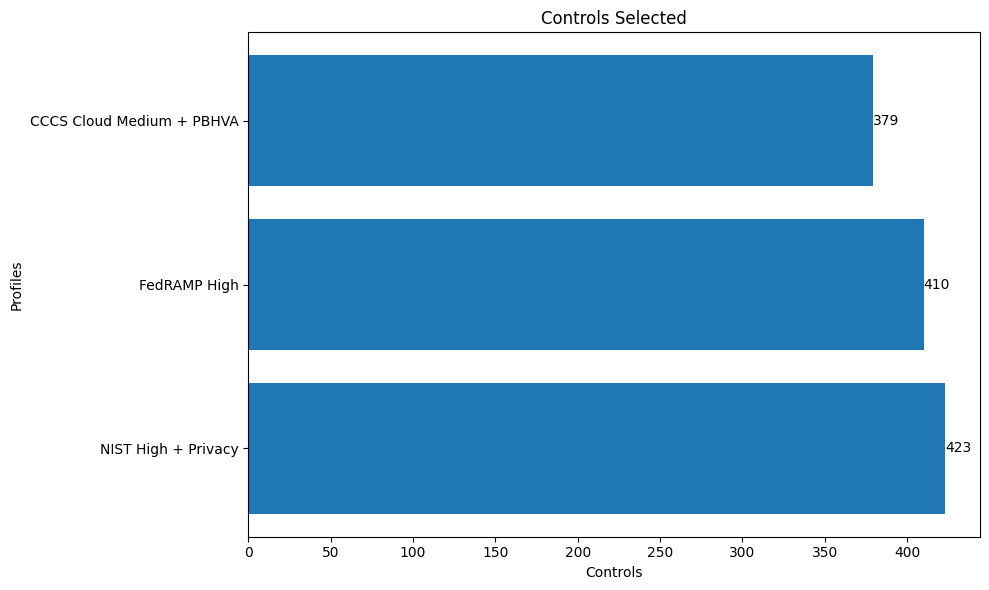

In [51]:
# Load data
categories = ['NIST High + Privacy', 'FedRAMP High', 'CCCS Cloud Medium + PBHVA']
values = [len(c) for c in [
    nist_high.controls | nist_privacy.controls, 
    fedramp_high.controls,
    cccs_medium_pbhva.controls
    ]
]

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(categories, values)

# Customize the plot
plt.title('Controls Selected')
plt.xlabel('Controls')
plt.ylabel('Profiles')

# Add value labels on the bars
for i, v in enumerate(values):
    plt.text(v, i, str(v), va='center')

plt.tight_layout()
plt.show()

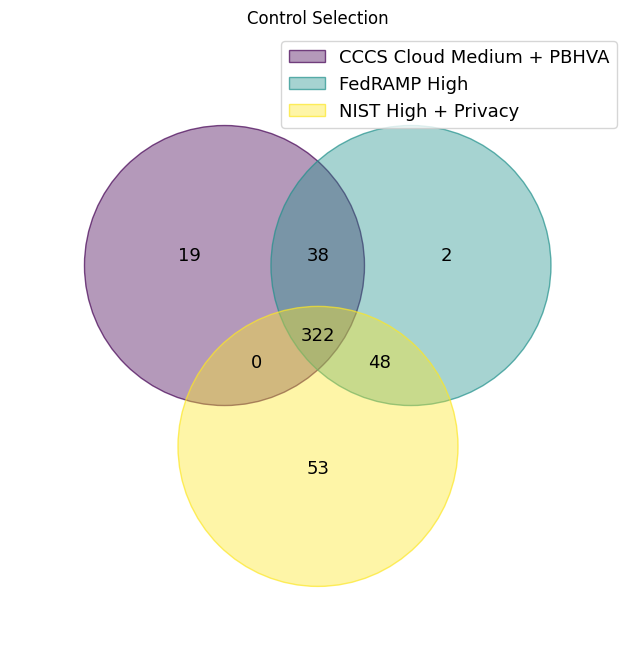

In [52]:
sets = {
    'CCCS Cloud Medium + PBHVA': cccs_medium_pbhva.controls,
    'FedRAMP High': fedramp_high.controls,
    'NIST High + Privacy': nist_high.controls | nist_privacy.controls
}

venn(sets)
plt.title("Control Selection")
plt.show()


## CCCS Profiles

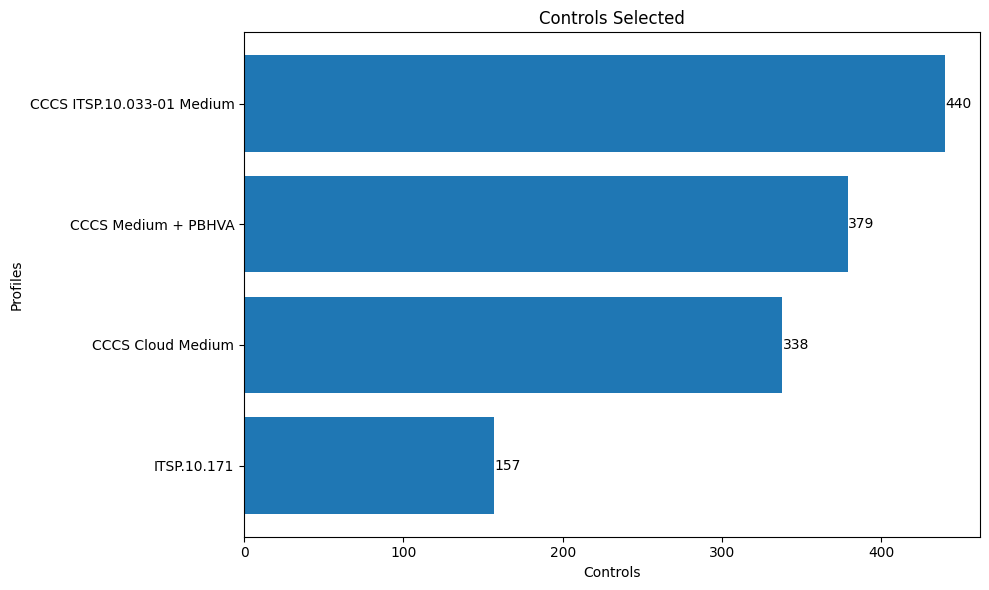

In [53]:
# Load data
categories = ['ITSP.10.171', 'CCCS Cloud Medium', 'CCCS Medium + PBHVA', 'CCCS ITSP.10.033-01 Medium']
values = [len(p.controls) for p in [cccs_171, cccs_cloud_medium, cccs_medium_pbhva, cccs_medium_impact]]

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(categories, values)

# Customize the plot
plt.title('Controls Selected')
plt.xlabel('Controls')
plt.ylabel('Profiles')

# Add value labels on the bars
for i, v in enumerate(values):
    plt.text(v, i, str(v), va='center')

plt.tight_layout()
plt.show()

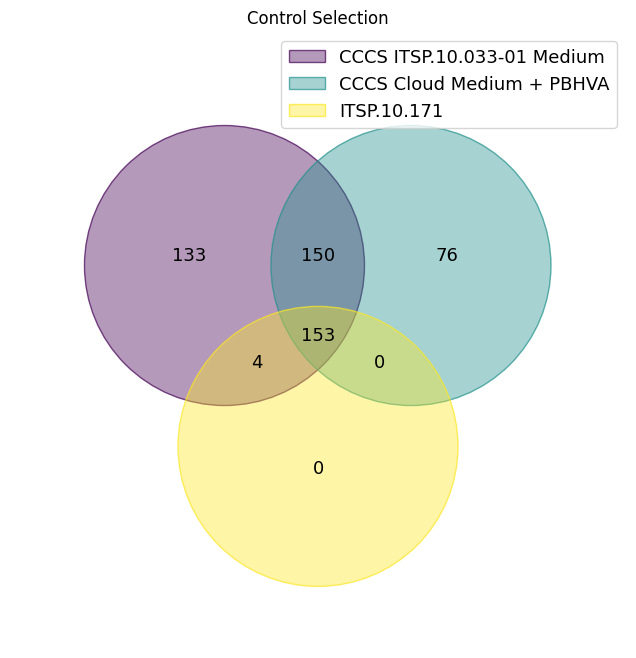

In [54]:
sets = {
    'CCCS ITSP.10.033-01 Medium': cccs_medium_impact.controls,
    'CCCS Cloud Medium + PBHVA': cccs_medium_pbhva.controls,
    'ITSP.10.171': cccs_171.controls
}

venn(sets)
plt.title("Control Selection")
plt.show()
